In [10]:
import pandas as pd
import numpy as np
import os

log_dir = os.path.join("log")
data_dir = os.path.join("Data")


price = pd.read_csv(os.path.join(data_dir, "electricity_price.csv"))
real_data = pd.read_csv(os.path.join(log_dir, "vars_result_real.csv"), index_col=0)
ro_data = pd.read_csv(os.path.join(log_dir, "vars_result_ro_g12.csv"), index_col=0)

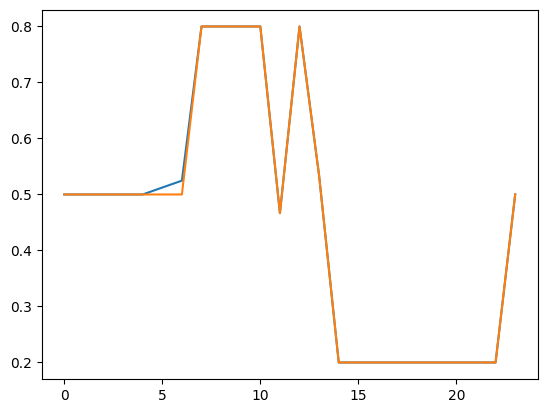

In [6]:
import matplotlib.pyplot as plt

plt.plot(ro_data['soc'])
plt.plot(real_data['soc'])

<BarContainer object of 24 artists>

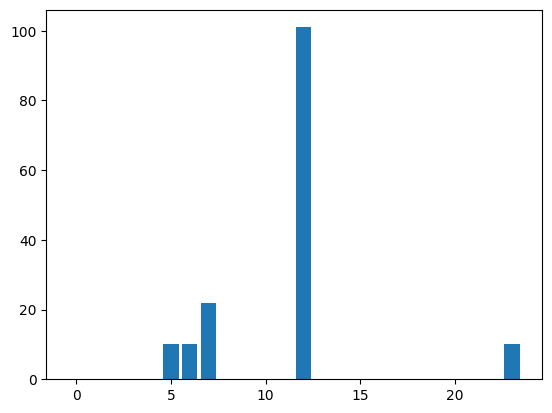

In [9]:
plt.bar(ro_data.index, ro_data['vb'])
plt.bar(ro_data.index, real_data['vb'])

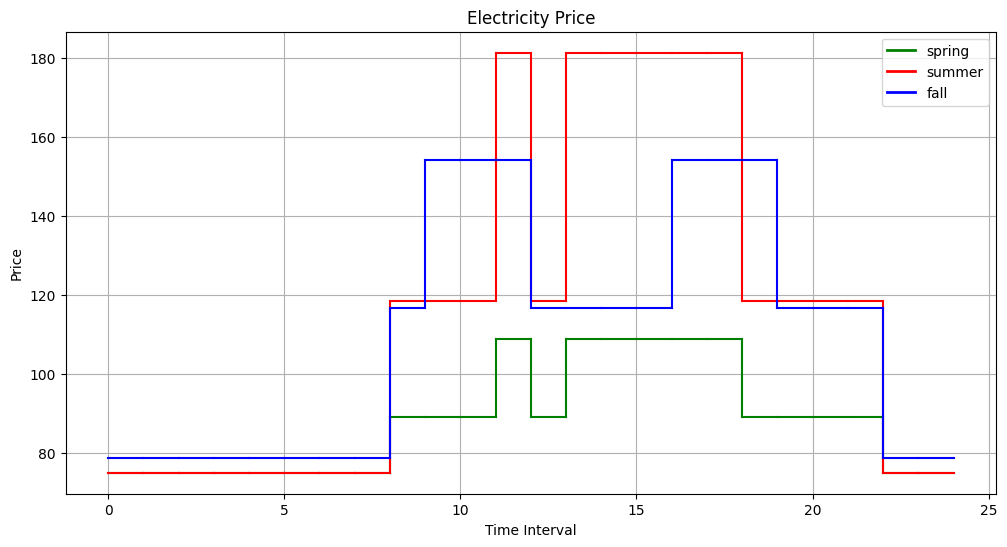

In [24]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# 그래프 초기화
plt.figure(figsize=(12, 6))

legend_lines = []

# 계절별 가격에 대해 구간 연결을 포함한 선 그래프 생성
colors = {"spring": "green", "summer": "red", "fall": "blue"}

for season, color in colors.items():
    prev_price = None  # 이전 구간의 가격 저장
    prev_tw_e = None  # 이전 구간의 끝 시간 저장
    
    for row in price.itertuples():
        # 현재 구간을 가로로 그림
        plt.plot([row.tw_s, row.tw_e], [getattr(row, season)] * 2, color=color)
        
        # 이전 구간과 현재 구간의 가격이 다르면 수직선 연결
        if prev_price is not None and prev_price != getattr(row, season):
            plt.plot([prev_tw_e, row.tw_s], [prev_price, getattr(row, season)], color=color)

        # 현재 값을 다음 루프를 위해 저장
        prev_price = getattr(row, season)
        prev_tw_e = row.tw_e

    
    legend_lines.append(Line2D([0], [0], color=colors[season], lw=2, label=season))

# 그래프 설정
plt.xlabel("Time Interval")
plt.ylabel("Price")
plt.title("Electricity Price")
plt.legend(handles=legend_lines)
plt.grid(True)
plt.show()
